In [6]:
#CHUNKING FOR NOUN PHRASES
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, RegexpParser

# Sample text
text = """King Krishnadevaraya loved horses and had the best collection of horse breeds in the Kingdom. Well, one day, a trader came to the King and told him that he had brought with him a horse of the best breed in Arabia. He invited the King to inspect the horse. King Krishnadevaraya loved the horse; so the trader said that the King could buy this one and that he had two more like this one, back in Arabia that he would go back to get. The King loved the horse so much that he had to have the other two as well. He paid the trader 5000 gold coins in advance. The trader promised that he would return within two days with the other horses. Two days turned into two weeks, and still, there was no sign of the trader and the two horses. One evening, to ease his mind, the King went on a stroll in his garden. There he spotted Tenali Raman writing down something on a piece of paper. Curious, the King asked Tenali what he was jotting down. Tenali Raman was hesitant, but after further questioning, he showed the King the paper. On the paper was a list of names, the King’s being at the top of the list. Tenali said these were the names of the biggest fools in the Vijayanagara Kingdom! As expected, the King was furious that his name was at the top and asked Tenali Raman for an explanation. Tenali referred to the horse story, saying the King was a fool to believe that the trader, a stranger, would return after receiving 5000 gold coins. Countering his argument, the King then asked, what happens if/when the trader does come back? In true Tenali humour, he replied saying, in that case, the trader would be a bigger fool, and his name would replace the King’s on the list!"""

# Tokenize the text
tokens = word_tokenize(text)

# Perform Part-of-Speech (POS) tagging
tagged = pos_tag(tokens)

# Define the noun phrase chunking grammar
grammar = r"""
  NP: {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
      {<NNP>+}                 # Chunk consecutive proper nouns
"""

# Create a chunk parser using the defined grammar
chunk_parser = RegexpParser(grammar)

# Parse the tagged text to extract chunks
chunks = chunk_parser.parse(tagged)

# Function to extract phrases from chunks
def extract_phrases(tree):
    phrases = []
    if hasattr(tree, 'label') and tree.label():
        if tree.label() == 'NP':
            phrases.append(' '.join([child[0] for child in tree]))
        else:
            for child in tree:
                phrases.extend(extract_phrases(child))
    return phrases

# Extract phrases from the chunks
noun_phrases = extract_phrases(chunks)

# Print the extracted noun phrases
for phrase in noun_phrases:
    print(phrase)

Krishnadevaraya
horses
the
collection
horse breeds
the Kingdom
Well
day
a trader
the King
a horse
the
breed
Arabia
the King
the horse
King Krishnadevaraya
the horse
the trader
the King
this
this
Arabia
The King
the horse
much
the other
the trader
gold coins
advance
The trader
days
the other horses
days
weeks
no sign
the trader
the
horses
evening
mind
the King
a stroll
garden
Tenali Raman
something
a piece
paper
Curious
the King
Tenali
Tenali Raman
hesitant
further questioning
the King the paper
the paper
a list
names
the King ’
the top
the list
Tenali
these
the names
the
fools
the Vijayanagara Kingdom
the King
furious
name
the top
Tenali Raman
an explanation
Tenali
the horse story
the King
a fool
the trader
a stranger
gold coins
argument
the King
the trader
true Tenali humour
that case
the trader
a
fool
name
the King ’ s
the list


In [11]:
#SEMANTIC ANALYSIS
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, ne_chunk

# Sample text
text = """King Krishnadevaraya loved horses and had the best collection of horse breeds in the Kingdom. Well, one day, a trader came to the King and told him that he had brought with him a horse of the best breed in Arabia. He invited the King to inspect the horse. King Krishnadevaraya loved the horse; so the trader said that the King could buy this one and that he had two more like this one, back in Arabia that he would go back to get. The King loved the horse so much that he had to have the other two as well. He paid the trader 5000 gold coins in advance. The trader promised that he would return within two days with the other horses. Two days turned into two weeks, and still, there was no sign of the trader and the two horses. One evening, to ease his mind, the King went on a stroll in his garden. There he spotted Tenali Raman writing down something on a piece of paper. Curious, the King asked Tenali what he was jotting down. Tenali Raman was hesitant, but after further questioning, he showed the King the paper. On the paper was a list of names, the King’s being at the top of the list. Tenali said these were the names of the biggest fools in the Vijayanagara Kingdom! As expected, the King was furious that his name was at the top and asked Tenali Raman for an explanation. Tenali referred to the horse story, saying the King was a fool to believe that the trader, a stranger, would return after receiving 5000 gold coins. Countering his argument, the King then asked, what happens if/when the trader does come back? In true Tenali humour, he replied saying, in that case, the trader would be a bigger fool, and his name would replace the King’s on the list!"""

# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Perform Named Entity Recognition (NER) on each sentence
for sentence in sentences:
    words = word_tokenize(sentence)
    tagged = pos_tag(words)
    named_entities = ne_chunk(tagged)
    # Print named entities found in the sentence
    for entity in named_entities:
        if isinstance(entity, nltk.Tree):
            if entity.label() == 'PERSON' or entity.label() == 'ORGANIZATION':
                print("Entity:", " ".join([leaf[0] for leaf in entity]))

Entity: Krishnadevaraya
Entity: Kingdom
Entity: Krishnadevaraya
Entity: Tenali Raman
Entity: Tenali
Entity: Tenali
Entity: Raman
Entity: Tenali
Entity: Tenali Raman


King: King Krishnadevaraya loved, King and told, King to inspect, King Krishnadevaraya loved, King could buy, King loved the, King went on, King asked Tenali, King the paper, King was furious, King was a, King then asked,
King Krishnadevaraya loved: King, King
King and told: King
King to inspect: King
King could buy: King
King loved the: King
King went on: King
King asked Tenali: King
King the paper: King
King was furious: King
King was a: King
King then asked,: King
Krishnadevaraya: Krishnadevaraya loved horses, Krishnadevaraya loved the
Krishnadevaraya loved horses: Krishnadevaraya
Krishnadevaraya loved the: Krishnadevaraya
Well,: Well, one day,
Well, one day,: Well,
He: He invited the, He paid the
He invited the: He
He paid the: He
Arabia: Arabia that he
Arabia that he: Arabia
The: The King loved, The trader promised
The King loved: The
The trader promised: The
Two: Two days turned
Two days turned: Two
One: One evening, to
One evening, to: One
There: There he spotted
There he spotte

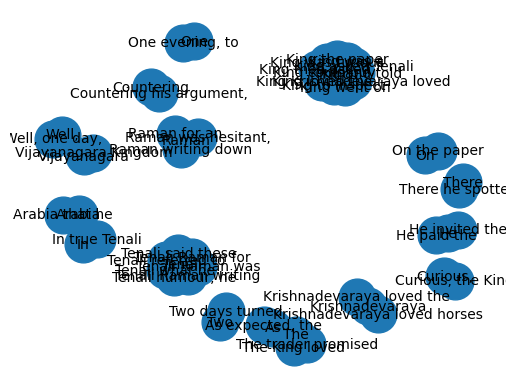

In [15]:
#SEMANTIC NETWORKS
import re
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Sample text
text = """King Krishnadevaraya loved horses and had the best collection of horse breeds in the Kingdom. Well, one day, a trader came to the King and told him that he had brought with him a horse of the best breed in Arabia.He invited the King to inspect the horse. King Krishnadevaraya loved the horse; so the trader said that the King could buy this one and that he had two more like this one, back in Arabia that he would go back to get. The King loved the horse so much that he had to have the other two as well. He paid the trader 5000 gold coins in advance. The trader promised that he would return within two days with the other horses.Two days turned into two weeks, and still, there was no sign of the trader and the two horses. One evening, to ease his mind, the King went on a stroll in his garden. There he spotted Tenali Raman writing down something on a piece of paper. Curious, the King asked Tenali what he was jotting down.Tenali Raman was hesitant, but after further questioning, he showed the King the paper. On the paper was a list of names, the King’s being at the top of the list. Tenali said these were the names of the biggest fools in the Vijayanagara Kingdom!As expected, the King was furious that his name was at the top and asked Tenali Raman for an explanation. Tenali referred to the horse story, saying the King was a fool to believe that the trader, a stranger, would return after receiving 5000 gold coins. Countering his argument, the King then asked, what happens if/when the trader does come back? In true Tenali humour, he replied saying, in that case, the trader would be a bigger fool, and his name would replace the King’s on the list!"""

# Function to extract entities from text
def extract_entities(text):
    entities = defaultdict(list)
    sentences = re.split(r'[.!?]', text)
    for sentence in sentences:
        if sentence.strip():
            words = sentence.split()
            for i, word in enumerate(words):
                if word.istitle():
                    entity = ' '.join(words[i:i+3])
                    if len(entity.split()) > 1:
                        entities[word].append(entity)
    return entities

# Function to build semantic network from entities
def build_semantic_network(entities):
    network = defaultdict(list)
    for entity, related_entities in entities.items():
        for related_entity in related_entities:
            network[entity].append(related_entity)
            network[related_entity].append(entity)
    return network

# Function to visualize the semantic network
def visualize_semantic_network(semantic_network):
    G = nx.Graph()
    # Add nodes and edges
    for entity, related_entities in semantic_network.items():
        for related_entity in related_entities:
            G.add_edge(entity, related_entity)
    # Draw the network
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    plt.axis('off')
    plt.show()

# Extract entities from text
entities = extract_entities(text)

# Build semantic network
semantic_network = build_semantic_network(entities)

# Print semantic network
for entity, related_entities in semantic_network.items():
    print(f"{entity}: {', '.join(related_entities)}")

# Visualize the semantic network
visualize_semantic_network(semantic_network)

In [ ]:
#TEXT SUMMARIZATION
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

# Sample text
text = """King Krishnadevaraya loved horses and had the best collection of horse breeds in the Kingdom. Well, one day, a trader came to the King and told him that he had brought with him a horse of the best breed in Arabia.He invited the King to inspect the horse. King Krishnadevaraya loved the horse; so the trader said that the King could buy this one and that he had two more like this one, back in Arabia that he would go back to get. The King loved the horse so much that he had to have the other two as well. He paid the trader 5000 gold coins in advance. The trader promised that he would return within two days with the other horses.Two days turned into two weeks, and still, there was no sign of the trader and the two horses. One evening, to ease his mind, the King went on a stroll in his garden. There he spotted Tenali Raman writing down something on a piece of paper. Curious, the King asked Tenali what he was jotting down.Tenali Raman was hesitant, but after further questioning, he showed the King the paper. On the paper was a list of names, the King’s being at the top of the list. Tenali said these were the names of the biggest fools in the Vijayanagara Kingdom!As expected, the King was furious that his name was at the top and asked Tenali Raman for an explanation. Tenali referred to the horse story, saying the King was a fool to believe that the trader, a stranger, would return after receiving 5000 gold coins. Countering his argument, the King then asked, what happens if/when the trader does come back? In true Tenali humour, he replied saying, in that case, the trader would be a bigger fool, and his name would replace the King’s on the list!"""

# Initialize the parser and tokenizer
parser = PlaintextParser.from_string(text, Tokenizer("english"))

# Initialize the LexRank summarizer
summarizer = LexRankSummarizer()

# Summarize the text
summary = summarizer(parser.document, sentences_count=2)

# Print the summary
for sentence in summary:
    print(sentence)

King Krishnadevaraya loved the horse; so the trader said that the King could buy this one and that he had two more like this one, back in Arabia that he would go back to get.
In true Tenali humour, he replied saying, in that case, the trader would be a bigger fool, and his name would replace the King’s on the list!
